# E-MAIL/SMS SPAM DETECTION

### Importing neccessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

### Loding dataset from csv file

In [3]:
df=pd.read_csv('spam.csv',encoding="latin")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Step 1 Basic Cleaning Process

In [5]:
#dropping unused columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [6]:
#renaming cloumns name for our convenient
df=df.rename(columns={"v1": "Label", "v2": "Message"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Encoding the Labels into 0 and 1 from

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['Label'])

In [9]:
df.head(5)

,Label,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
#missing values
df.isnull().sum()

Label      0
Message    0
target     0
dtype: int64

In [11]:
#checking for duplicate rows
df.duplicated().sum()

403

In [12]:
#removing duplicate rows from dataset
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 3)

## Step 2 Exploratory Data analysis-EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1c16a163dc0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Not Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

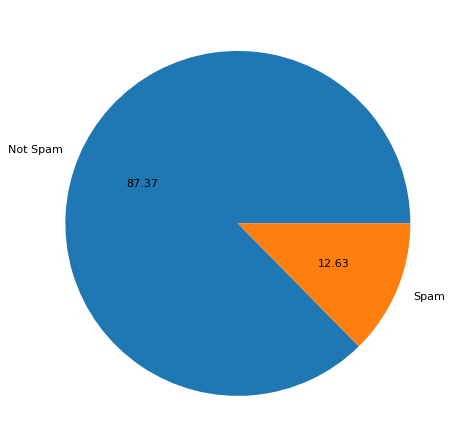

In [16]:
plt.figure(figsize=(10,7),dpi=80)
plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')

In [17]:
# Here our Data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [18]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:
#counting total number of character in the message
df['num_character']=df['Message'].apply(len)
#counting total number of words in the message
df['num_word']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
#counting total number of sentences in the message
df['num_senc']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Label,Message,target,num_character,num_word,num_senc
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [20]:
df[['num_character','num_word','num_senc']].describe()

,num_character,num_word,num_senc
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#describe for spam message
df[df['target']==1][['num_character','num_word','num_senc']].describe()

,num_character,num_word,num_senc
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
#describe for not spam message
df[df['target']==0][['num_character','num_word','num_senc']].describe()

,num_character,num_word,num_senc
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


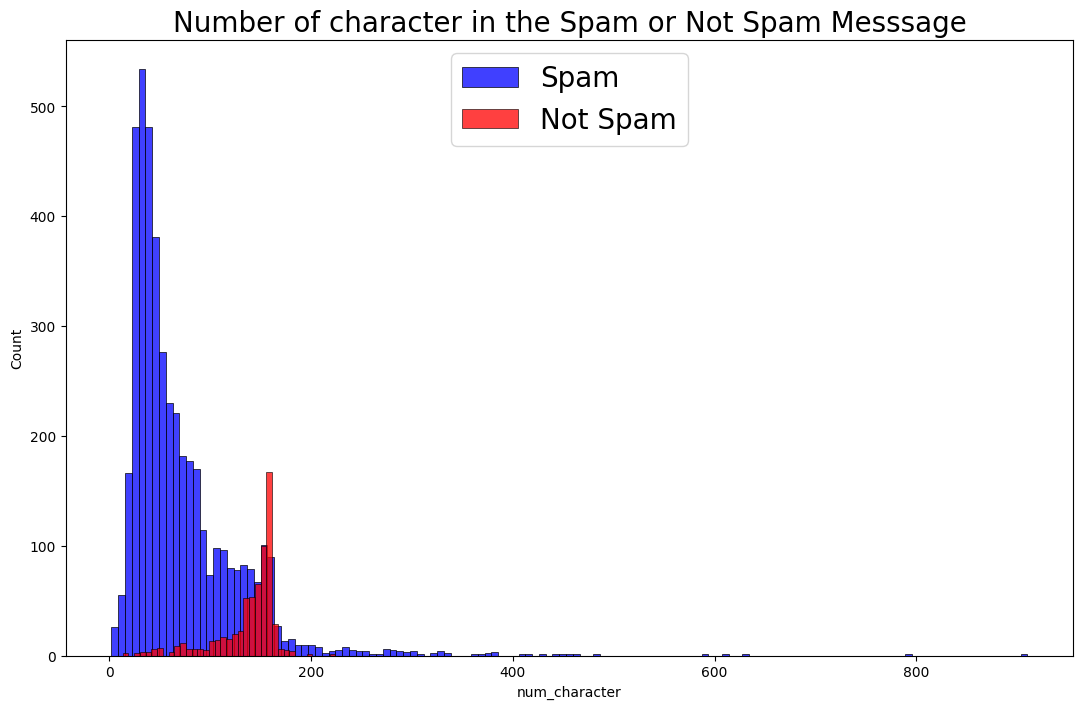

In [23]:
plt.figure(figsize=(13,8))
plt.title('Number of character in the Spam or Not Spam Messsage',fontsize = 20)
sn.histplot(data=df[df['target']==0]['num_character'],color='blue')
sn.histplot(data=df[df['target']==1]['num_character'],color='red')
plt.legend(['Spam','Not Spam'],loc ='upper center', fontsize = 20)
plt.show()

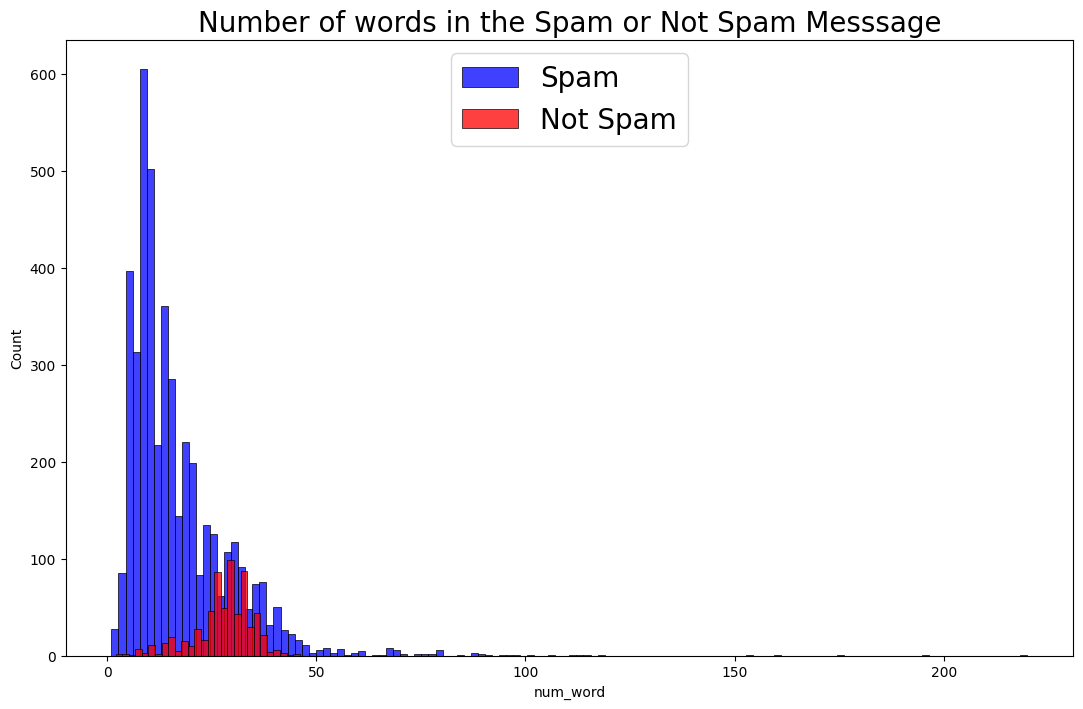

In [24]:
plt.figure(figsize=(13,8))
plt.title('Number of words in the Spam or Not Spam Messsage',fontsize = 20)
sn.histplot(data=df[df['target']==0]['num_word'],color='blue')
sn.histplot(data=df[df['target']==1]['num_word'],color='red')
plt.legend(['Spam','Not Spam'],loc ='upper center', fontsize = 20)
plt.show()

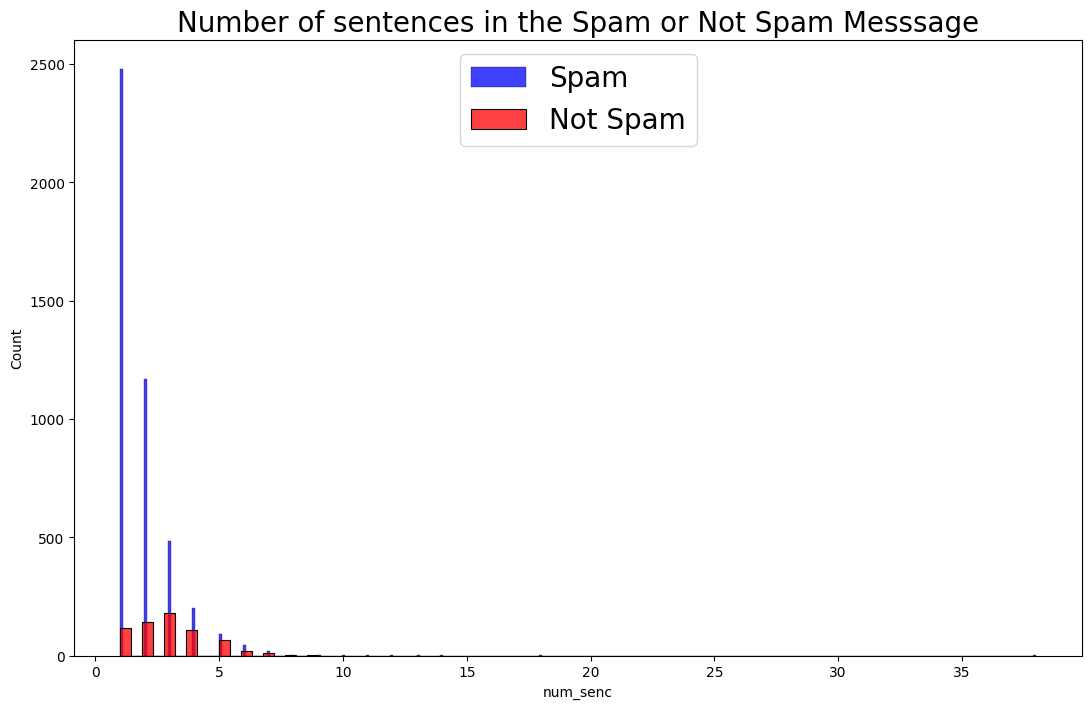

In [25]:
plt.figure(figsize=(13,8))
plt.title('Number of sentences in the Spam or Not Spam Messsage',fontsize = 20)
sn.histplot(data=df[df['target']==0]['num_senc'],color='blue')
sn.histplot(data=df[df['target']==1]['num_senc'],color='red')
plt.legend(['Spam','Not Spam'],loc ='upper center', fontsize = 20)
plt.show()

c:\Users\ayada\OneDrive\Desktop\Gyanendra\Email_Sms-Spam-Detection-Classifier\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


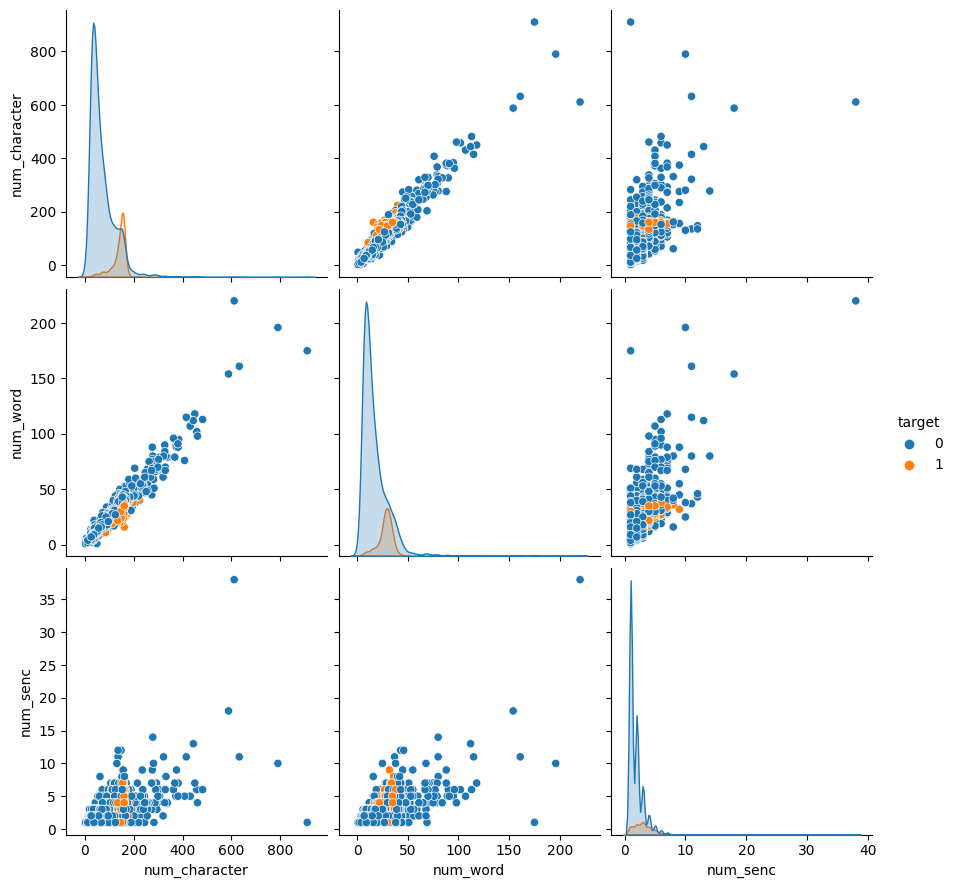

In [26]:
sn.pairplot(df,hue='target', height=3, aspect=1)

## Step 3
- Lower Case
- Tokenization
- Removing special character 
- Removing stop words and punctuation
- Stemming

In [33]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords

In [34]:
def transform_text(text):
    text=text.lower()#lowering
    words=nltk.tokenize.word_tokenize(text)#tokenization
    y=[]
    for word in words:
        if word.isalnum():#removing special characters
            y.append(word)
    text=y[:]
    y.clear()
    for word in text:#removing stowords and punctuation
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))#stemming
        
    return " ".join(y)


In [35]:
print(transform_text("My loving name is Anurag! @# !!!"))

love name anurag


In [36]:
print(transform_text(df['Message'][10]))

gon na home soon want talk stuff anymor tonight k cri enough today


In [37]:
df['transformed_text']=df['Message'].apply(transform_text)

In [38]:
df.head()

,Label,Message,target,num_character,num_word,num_senc,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


### World CLoud of most common words

In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

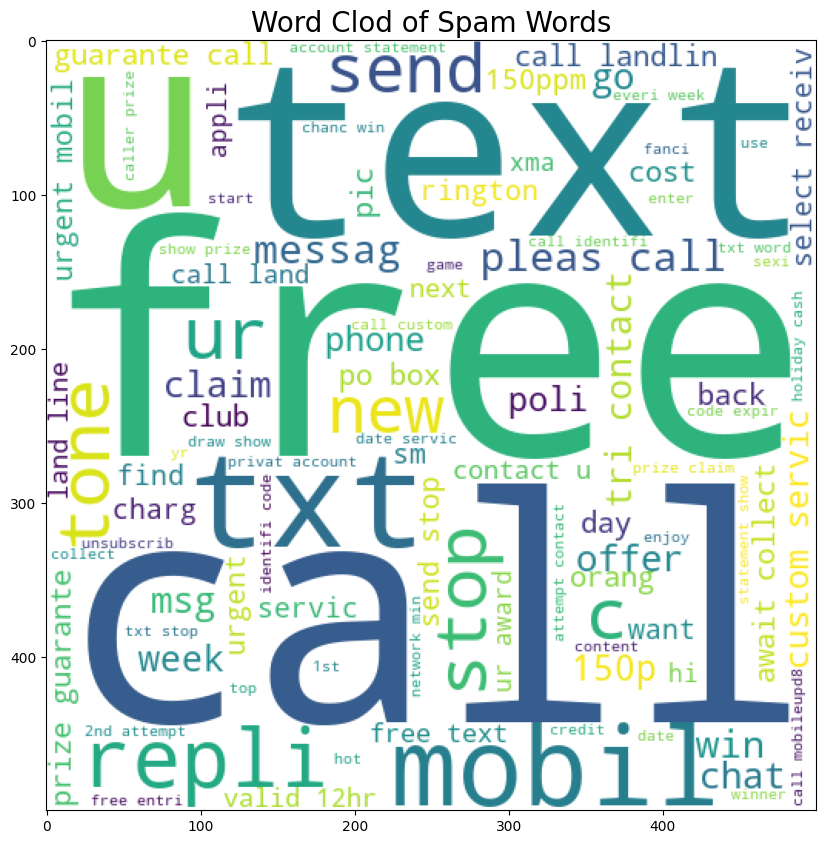

In [40]:
plt.figure(figsize=(10,10))
plt.title("Word Clod of Spam Words",fontsize=20)
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

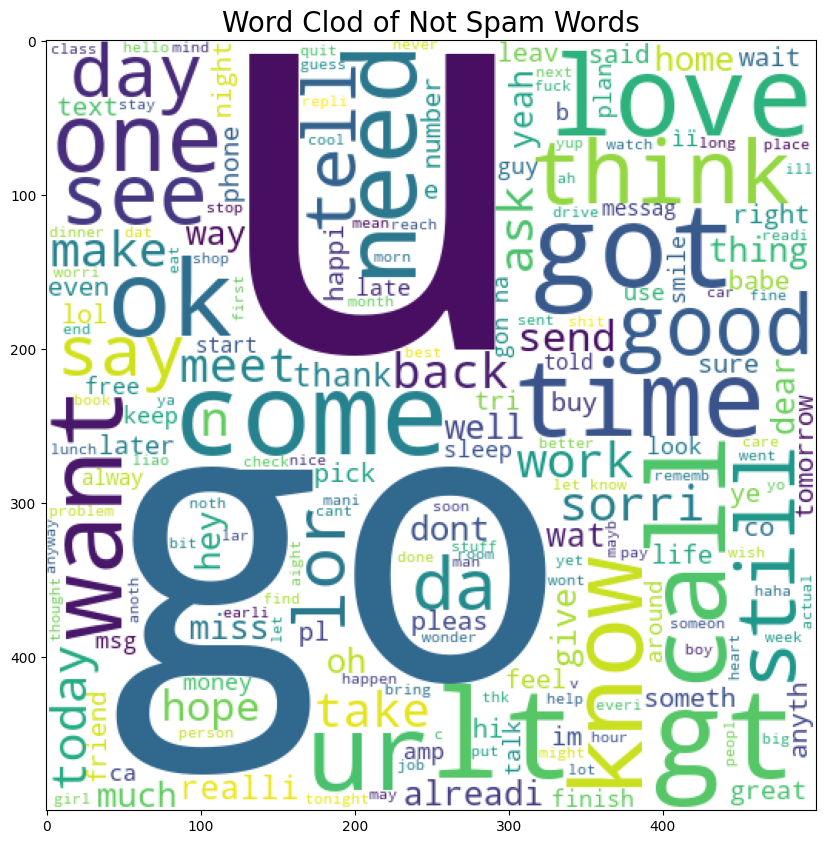

In [41]:
plt.figure(figsize=(10,10))
plt.title("Word Clod of Not Spam Words",fontsize=20)
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

Top 30 words of spam and not spam

## Step 4 Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
cv=CountVectorizer(max_features=3000)
X=cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [48]:
y=df['target'].values

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

### GaussainNB+CountVectorizer

In [51]:
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.874274661508704
[[787 109]
 [ 21 117]]
0.5176991150442478


### MultinomialNB+CountVectorizer

In [52]:
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.971953578336557
[[880  16]
 [ 13 125]]
0.8865248226950354


### BernoulliNB+CountVectorizer

In [53]:
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [54]:
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

print("**************************TfidfVectorizer+GaussianNB**********************************")
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

print("**************************TfidfVectorizer+MultinomailNB********************************")
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

print("**************************TfidfVectorizer+BernoulliNB***********************************")
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

**************************TfidfVectorizer+GaussianNB**********************************
0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932
**************************TfidfVectorizer+MultinomailNB********************************
0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
**************************TfidfVectorizer+BernoulliNB***********************************
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [53]:
import pickle
pickle.dump(tfidf,open('tfidfvectorizer.pkl','wb'))
pickle.dump(mnb,open('SMSSpamDetectionClassifier.pkl','wb'))